## 프로젝트: 나랑 닮은 연예인을 찾아보자

### Step 1. 사진 모으기

##### import

In [77]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import cv2
import face_recognition

%matplotlib inline

##### image data

In [61]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/'
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/'

### Step2. 얼굴 영역 자르기

In [62]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

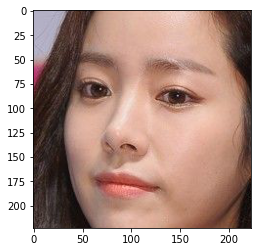

In [63]:
image_path1 = os.getenv('HOME')+'/aiffel/face_embedding/images/Hanjimin.jpeg'

cropped_face = get_cropped_face(image_path1)
plt.imshow(cropped_face)

### Step3. 얼굴 영역의 임베딩 추출하기

In [64]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [65]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    print(file_list)
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        print(img_path)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0: 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            
    return embedding_dict

In [66]:
embedding_dict = get_face_embedding_dict(dir_path)

['bush.jpeg', 'Iyou.jpeg', 'Songgain.png', 'Parksujune.jpeg', 'clinton.jpeg', 'kongyou.jpeg', 'biden.jpg', 'Parksunyoung.jpeg', 'trump.jpg', 'Seungri.jpeg', 'obama.jpg', 'Sujii.jpeg', 'Jeongwoosung.jpeg', 'Hanjimin.jpeg', 'reagan.jpg', 'my_image3.jpg', 'Shinsegyeng.jpeg', 'Leeyounhee.jpeg', 'kangsora.jpeg', 'kimgura.jpeg']
/home/aiffel-dj51/aiffel/face_embedding/images/bush.jpeg
/home/aiffel-dj51/aiffel/face_embedding/images/Iyou.jpeg
/home/aiffel-dj51/aiffel/face_embedding/images/Songgain.png
/home/aiffel-dj51/aiffel/face_embedding/images/Parksujune.jpeg
/home/aiffel-dj51/aiffel/face_embedding/images/clinton.jpeg
/home/aiffel-dj51/aiffel/face_embedding/images/kongyou.jpeg
/home/aiffel-dj51/aiffel/face_embedding/images/biden.jpg
/home/aiffel-dj51/aiffel/face_embedding/images/Parksunyoung.jpeg
/home/aiffel-dj51/aiffel/face_embedding/images/trump.jpg
/home/aiffel-dj51/aiffel/face_embedding/images/Seungri.jpeg
/home/aiffel-dj51/aiffel/face_embedding/images/obama.jpg
/home/aiffel-dj51/aiff

### Step4. 모은 연예인들과 비교하기

In [67]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [68]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [69]:
def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(1, top):
        if sorted_faces[i]:
            print('순위 {}  이름 : {}  거리 : {}'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    
    return sorted_faces, sort_key_func

##### 결과

In [70]:
for item in embedding_dict.items():
    print(item[0])

bush
Iyou
Songgain
Parksujune
clinton
kongyou
biden
Parksunyoung
trump
Seungri
obama
Sujii
Hanjimin
reagan
my_image3
Shinsegyeng
Leeyounhee
kangsora
kimgura


##### 임베딩 거리 측정

In [71]:
sorted_faces, key = get_nearest_face('my_image3')

순위 1  이름 : Songgain  거리 : 0.502073094567874
순위 2  이름 : kimgura  거리 : 0.5500268824483453
순위 3  이름 : Hanjimin  거리 : 0.5668296531607404
순위 4  이름 : Iyou  거리 : 0.605185950545833
순위 5  이름 : Seungri  거리 : 0.6055418785231754


##### My image

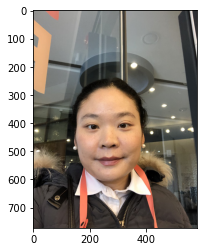

In [72]:
my_image = image_path + 'my_image3.jpg'
plt.imshow(face_recognition.load_image_file(my_image))

##### 닮은 연예인 Top 5

In [78]:
import matplotlib.font_manager as fm

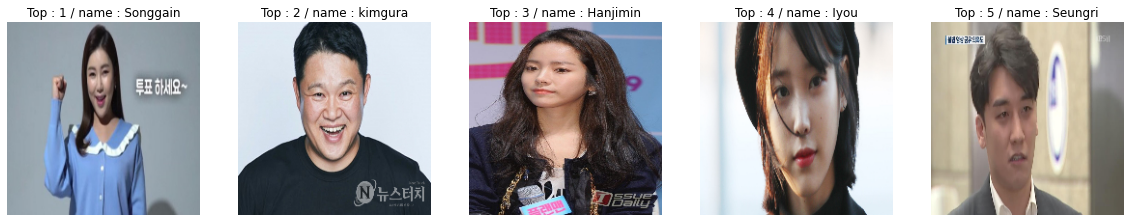

In [81]:
rc('font', family="DejaVu Sans")
plt.figure(figsize=(20,20))
for idx, image_ in enumerate(sorted_faces[1:6]):
    plt.subplot(1,5,idx+1)
    image = image_path + image_[0] + '.jpeg'
    result = face_recognition.load_image_file(image)
    resized = cv2.resize(result, (200, 200))
    plt.imshow(resized)
    title = 'Top : {} / name : {}'.format(idx+1, image_[0])
    plt.title(title, fontdict={'color':'black'})
    plt.axis('off')

### 느낀점 (회고)

닮은 순위 top 5 연예인들의 임베딩 거리를 측정하였고, 결과는 다음과 같았습니다.

|순위|이름|거리|
|------|:---|:---|
|1|Songgain|0.502073094567874|
|2|kimgura|0.5500268824483453|
|3|Hanjimin|0.5668296531607404|
|4|Iyou|0.605185950545833|
|5|Seungri|0.6055418785231754|

결과를 바탕으로 5명의 사진을 출력해보았습니다.